Para empezar la limpieza de datos empezaros primero cargando librerias e ir limpiando columna a columna las cosas que no nos cuadren.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(22)

Queremos limpiar nulls y datos que no concuerdan

In [2]:
df = pd.read_csv("../data/raw/bgg_dataset.csv",sep=";")

In [3]:
df["Complexity Average"] = df["Complexity Average"].str.replace(",",".").astype(float) # Cambiamos las comas por puntos y pasamos a float
df["Rating Average"] = df["Rating Average"].str.replace(",",".").astype(float) # Cambiamos las comas por puntos y pasamos a float
media_valores_año = int(np.mean(df.loc[df["Year Published"] >= 0, "Year Published"])) # Hacemos la media de los años para dar un valor concreto a los años
df.loc[df["Year Published"] < 1, "Year Published"] = media_valores_año # Miramos que todos los años menores de 1 sean
df.loc[df["Year Published"].isna(), "Year Published"] = media_valores_año
df["Year Published"] = df["Year Published"].astype(int) # Pasamos a int todos los años


Quitamos de la fila de Domains los null como no definidos.

In [4]:
df.loc[df["Domains"].isnull(), "Domains"] = "Not Defined" # Definimos como "Not Defined" los valores null del dataset

En Mechanics ponemos los nulls igual que en domains como "Not Defined"

In [5]:
df.loc[df["Mechanics"].isnull(), "Mechanics"] = "Not Defined" # Definimos como "Not Defined" los valores null del dataset

En Owned Users ponemos los nulls igual que en domains como "Not Defined"

In [6]:
media_valores_owned = int(np.mean(df.loc[df["Owned Users"] >= 0, "Owned Users"]))
df.loc[df["Owned Users"].isna(), "Owned Users"] = media_valores_owned # Definimos los valores null como media de owned por juego.
df["Owned Users"] = df["Owned Users"].astype(int)

In [7]:
df["Rating Average"]

0        8.79
1        8.61
2        8.66
3        8.43
4        8.70
         ... 
20338    2.28
20339    2.85
20340    3.18
20341    2.86
20342    2.68
Name: Rating Average, Length: 20343, dtype: float64

En ID tendremos que asignar valores que no estén repetidos en las columnas. Quitamos los valores nulos y sustituimos por valores aleatorios.


In [8]:
valores_nulos = df["ID"].isnull() # Vemos los valores nulos
valores_no_nulos = df["ID"].dropna().unique() # Sacamos los valores que no son nulos
valores_aleatorios = np.random.choice(valores_no_nulos, size=valores_nulos.sum(), replace=False) # Hacemos valores aleatorios en una variable
df.loc[valores_nulos, "ID"] = valores_aleatorios # Cambiamos valores nulos y sustituimos por valores aleatorios 
df["ID"] = df["ID"].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  int32  
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  int32  
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  int32  
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(2), int32(3), int64(6), object(3)
memory usage: 1.9+ MB


<AxesSubplot:>

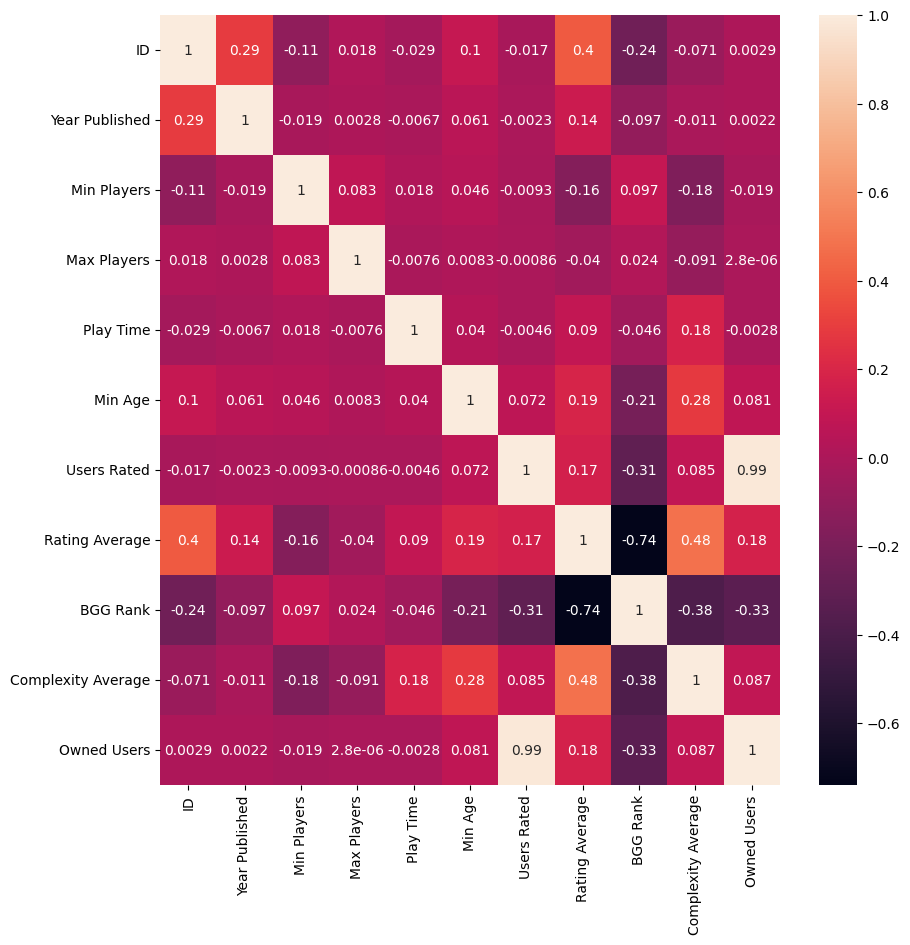

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
df["Domains"].str.split(",")

0          [Strategy Games,  Thematic Games]
1          [Strategy Games,  Thematic Games]
2                           [Strategy Games]
3                           [Strategy Games]
4          [Strategy Games,  Thematic Games]
                        ...                 
20338                     [Children's Games]
20339                          [Party Games]
20340                     [Children's Games]
20341                     [Children's Games]
20342    [Abstract Games,  Children's Games]
Name: Domains, Length: 20343, dtype: object